In [34]:
# loading the libraries 

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [35]:
# initializing the sample size, X data and Y data

N = 20

X = np.random.random(N) * 10 - 5 # (-5, 5)

Y = 0.5  * X - 1 + np.random.randn(N)

In [36]:
# building the model

model = nn.Linear(1, 1)

In [37]:
# building the loss fuction and optimization function

criterion = nn.MSELoss()

optimiser = torch.optim.SGD(model.parameters(), lr = 0.1)

In [38]:
# reshaping

X = X.reshape(N, 1)

Y = Y.reshape(N, 1)

In [39]:
# converting numpy to torch tensors

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [40]:
# training and all

n_epochs = 30
losses = []

for i in range(n_epochs):
    
    optimiser.zero_grad()
    
    output = model(inputs)
    loss = criterion(output, targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimiser.step()
    
    print(f'Epoch {i+1}/{n_epochs}, loss: {loss.item():.4f}')

Epoch 1/30, loss: 14.7267
Epoch 2/30, loss: 4.5764
Epoch 3/30, loss: 2.2737
Epoch 4/30, loss: 1.7035
Epoch 5/30, loss: 1.5332
Epoch 6/30, loss: 1.4661
Epoch 7/30, loss: 1.4322
Epoch 8/30, loss: 1.4124
Epoch 9/30, loss: 1.4002
Epoch 10/30, loss: 1.3925
Epoch 11/30, loss: 1.3875
Epoch 12/30, loss: 1.3844
Epoch 13/30, loss: 1.3823
Epoch 14/30, loss: 1.3811
Epoch 15/30, loss: 1.3802
Epoch 16/30, loss: 1.3797
Epoch 17/30, loss: 1.3794
Epoch 18/30, loss: 1.3791
Epoch 19/30, loss: 1.3790
Epoch 20/30, loss: 1.3789
Epoch 21/30, loss: 1.3789
Epoch 22/30, loss: 1.3788
Epoch 23/30, loss: 1.3788
Epoch 24/30, loss: 1.3788
Epoch 25/30, loss: 1.3788
Epoch 26/30, loss: 1.3788
Epoch 27/30, loss: 1.3788
Epoch 28/30, loss: 1.3788
Epoch 29/30, loss: 1.3788
Epoch 30/30, loss: 1.3788


In [41]:
# losses

losses

[14.726667404174805,
 4.576366901397705,
 2.273683786392212,
 1.7034637928009033,
 1.5331664085388184,
 1.4660980701446533,
 1.4321972131729126,
 1.4124382734298706,
 1.4002058506011963,
 1.3924636840820312,
 1.3875256776809692,
 1.384367823600769,
 1.382346749305725,
 1.3810527324676514,
 1.3802242279052734,
 1.3796937465667725,
 1.3793540000915527,
 1.3791364431381226,
 1.3789973258972168,
 1.3789080381393433,
 1.3788509368896484,
 1.378814458847046,
 1.378791093826294,
 1.3787760734558105,
 1.378766417503357,
 1.3787602186203003,
 1.3787562847137451,
 1.3787537813186646,
 1.3787522315979004,
 1.3787510395050049]

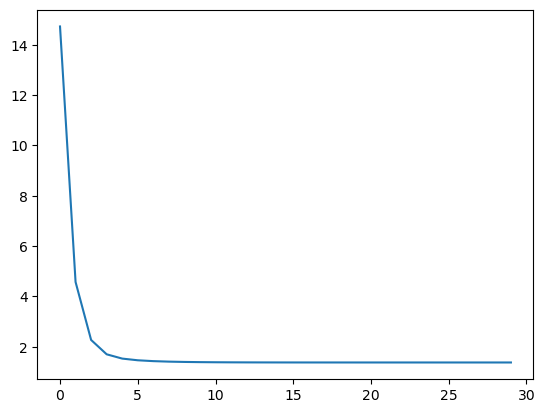

In [42]:
# plotting the loss

plt.plot(losses)
plt.show()

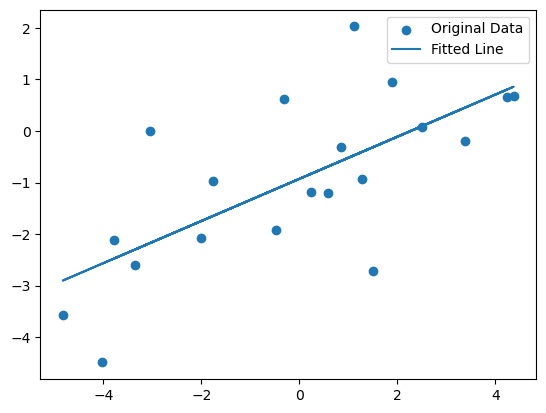

In [43]:
# plotting a line on our sample data

predictions = model(inputs).detach().numpy()

plt.scatter(X, Y, label = 'Original Data')
plt.plot(X, predictions, label = 'Fitted Line')

plt.legend()
plt.show()

In [44]:
# understanding why we can't directly use .numpy on our model

model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [45]:
# another way to use .numpy on our model

with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-2.5707917 ],
       [ 0.4541636 ],
       [-2.9016018 ],
       [-1.7487664 ],
       [-1.1215031 ],
       [-1.052846  ],
       [-0.4021955 ],
       [-0.69083166],
       [-0.8348427 ],
       [ 0.09758681],
       [-0.31062597],
       [-0.5843606 ],
       [ 0.85861045],
       [-2.4733014 ],
       [-0.15593076],
       [ 0.8019019 ],
       [-0.47107345],
       [-1.6464202 ],
       [-2.29963   ],
       [-2.177514  ]], dtype=float32)

In [46]:
# extracting out the weights and biases

w = model.weight.data.numpy()
b = model.bias.data.numpy()

In [47]:
print(w, b)

[[0.40874285]] [-0.9286445]


In [48]:
# saving the model

model.state_dict()

OrderedDict([('weight', tensor([[0.4087]])), ('bias', tensor([-0.9286]))])

In [51]:
# model saved

torch.save(model.state_dict(), 'lrpymodel')